In [6]:
import json
with open('output.json', 'r') as file:
    # Load JSON data from the file
    companies_data = json.load(file)

companies_data

[{'Filing Type': 'Corporation - Business - Foreign',
  'Status': 'Active',
  'Standing - AR': 'Good',
  'Standing - RA': 'Good',
  'Standing - Other': 'Good',
  'Formed In': 'NORTH CAROLINA',
  'Term of Duration': 'Perpetual',
  'Initial Filing Date': '05/30/2018',
  'Principal Address': '4043 PIEDMONT PARKWAY\nHIGH POINT, NC 27265-9402',
  'Mailing Address': '615 S COLLEGE ST\nFL 9\nTAX DEPT\nCHARLOTTE, NC 28202-3355',
  'AR Due Date': '05/15/2025',
  'Commercial Registered Agent': 'REGISTERED AGENT SOLUTIONS, INC.\n1709 N 19TH ST STE 3\nBISMARCK, ND  58501-2121',
  'COMPANY': 'GXO LOGISTICS SUPPLY CHAIN, INC.'},
 {'Filing Type': 'Limited Liability Company - Business - Foreign',
  'Status': 'Active',
  'Standing - AR': 'Good',
  'Standing - RA': 'Good',
  'Standing - Other': 'Good',
  'Formed In': 'DELAWARE',
  'Term of Duration': 'Perpetual',
  'Initial Filing Date': '11/26/2019',
  'Principal Address': 'ONE WORLD TRADE CENTER\n41ST FLOOR\nNEW YORK, NY 10007',
  'Mailing Address': '1

In [27]:
import networkx as nx
G = nx.Graph() # Person or Company that is an agent / owner
for data in companies_data:
    company_name = data["COMPANY"]
    G.add_node(company_name, type="Company")
    if "Commercial Registered Agent" in data:
        cr_agent = data["Commercial Registered Agent"].split("\n")[0]
        G.add_node(cr_agent, type="Person")
        G.add_edges_from([(company_name, cr_agent),])
    if "Registered Agent" in data:
        r_agent = data["Registered Agent"].split("\n")[0]
        G.add_node(r_agent, type="Person")
        G.add_edges_from([(company_name, r_agent),])
    if "Owner Name" in data:
        owner = data["Owner Name"]
        G.add_node(owner, type="Person")
        G.add_edges_from([(company_name, owner),])
    elif "Owners" in data:
        owner_1 = data["Owners"].split("\n")[0]
        owner_2 = data[""].split("\n")[0]
        G.add_node(owner_1, type="Person")
        G.add_node(owner_2, type="Person")
        edges = [(owner_1, company_name), (owner_2, company_name),]
        G.add_edges_from(edges)

Text(0.5, 1.0, 'Company and Owner Network')

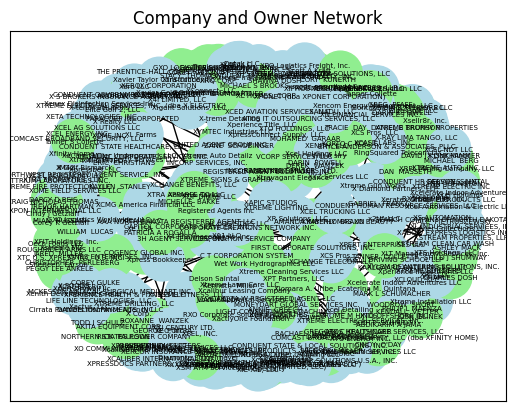

In [28]:
import matplotlib.pyplot as plt

type_colors = {
    'Company': 'lightblue',
    'Person': 'lightgreen'
}

# Get node colors based on type
node_colors = [type_colors[G.nodes[node]['type']] for node in G.nodes]

pos = nx.spring_layout(G, seed=42, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)
nx.draw_networkx_labels(G, pos, font_size=5)
plt.title('Company and Owner Network')

Graph named 'G208' with 809 nodes and 1112 edges
142 connected components


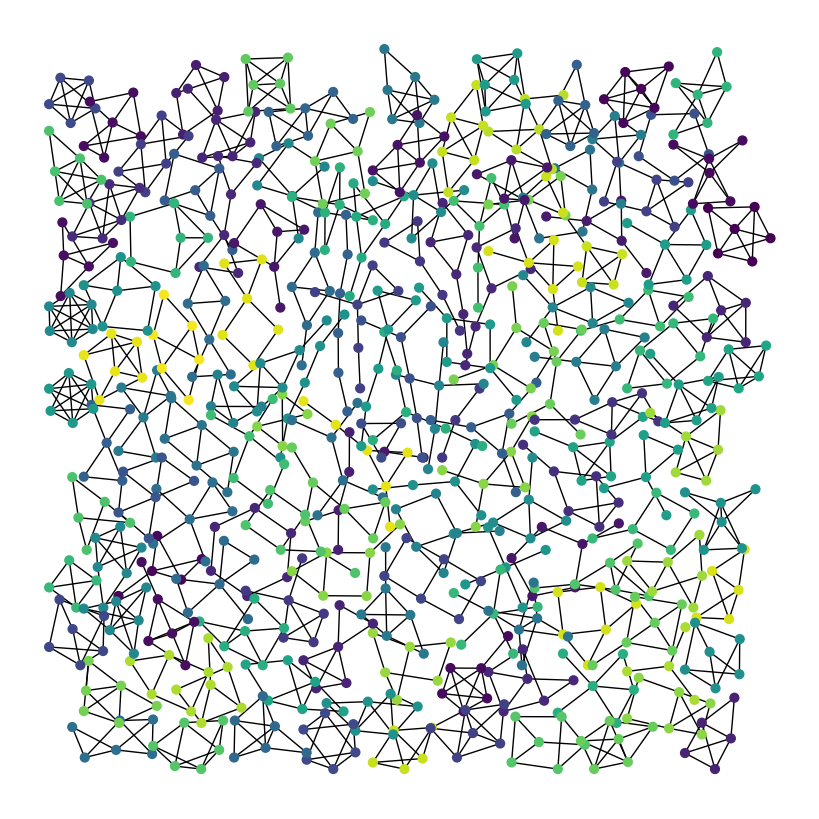

In [29]:
import random

import matplotlib.pyplot as plt
import networkx as nx


GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher


def atlas6():
    """Return the atlas of all connected graphs with at most 6 nodes"""

    Atlas = nx.graph_atlas_g()[3:209]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U


G = atlas6()

print(G)
print(nx.number_connected_components(G), "connected components")

plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()